# User Story 2
- User fills out the Blueprint with the PARAMS and executes several subfunctions of the experiment pipeline stepwise.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef and ElectricDevices.
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from apply_dca import apply_label_errors, visualize_acc_decr, visualize_trace_M, check_for_results

In [3]:
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","random_seed":0,"start":0,"stop":6,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True                                           #Define if results should be saved

In [ ]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
#x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME,doe_param=DoE_PARAM)

In [5]:
df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.0000,0.7667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,1,1,0.0333,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
2,2,2,0.0666,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
3,3,3,0.0999,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,4,4,0.1332,0.8000,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
5,5,5,0.1665,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
6,6,6,0.1998,0.7000,"[1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
7,7,7,0.2331,0.6667,"[1, 1, 1, 1, 1, 1, 2, 5, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 5, 2, 5, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
8,8,8,0.2664,0.6333,"[1, 1, 1, 1, 1, 5, 2, 5, 5, 2, 1, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 5, 2, 5, 2, 1, 1, 2, 3, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
9,9,9,0.2997,0.5667,"[1, 1, 1, 1, 1, 5, 3, 5, 5, 2, 1, 2, 3, 3, 3, ...","[3, 1, 1, 1, 1, 5, 3, 5, 3, 1, 1, 5, 3, 3, 3, ...","[[0.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...."


In [8]:
DATASET_NAME = "ElectricDevices"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"                       #should be in cl_ names
REDUCTION_F = 10                                   #optional. only for large datasets
DCA= "LabelErrors"                      
DoE_PARAM = {"le_strategy": "leV1", "random_seed":1,"start":0,"stop":400,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                              #respect folder structure
SAVE_FILES = True 

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
label_names:  ['1' '2' '3' '4' '5' '6' '7']
Current Label Errors Strategy: DEFAULT: leV1
The p_vector for the current_experiment: [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429]
searching for ['ElectricDevices_res_leV1_0_0_400_5.csv'] in simulation_results/MR-Hydra/ElectricDevices
Potential Files in the current directory:  ['ElectricDevices_res_leV1_0_0_500_5.csv', 'ElectricDevices_res_0_0_350_5.csv', 'ElectricDevices_res_leV1_0_0_700_5.csv', 'ElectricDevices_res_leV1_0_0_350_5.csv', 'ElectricDevices_res_leV1_0_0_600_5.csv', 'ElectricDevices_res_leV1_0_0_650_5.csv', 'ElectricDevices_res_leV1_0_0_320_5.csv', 'ElectricDevices_res_0_0_300_5.csv', 'ElectricDevices_acc_decr.png']
results are not present with the current experi

INFO:basic_func:------------------------Train time=6.20s, Eval Time=8.02s



Algorithm                         Accuracy
MR-Hydra                          0.6874
current iteration: 0   current LE_step: 0 error_relative: 0
changed label 6 to 7 at index 464 of the data
changed label 6 to 4 at index 646 of the data
changed label 3 to 6 at index 171 of the data
changed label 3 to 1 at index 784 of the data
changed label 2 to 3 at index 625 of the data
current class balance distribution: {'1': 85, '2': 230, '3': 78, '4': 155, '5': 225, '6': 52, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.81s, Eval Time=8.04s



Algorithm                         Accuracy
MR-Hydra                          0.6874
current iteration: 1   current LE_step: 5 error_relative: 0.0055
changed label 7 to 4 at index 260 of the data
changed label 2 to 7 at index 296 of the data
changed label 1 to 2 at index 271 of the data
changed label 4 to 1 at index 870 of the data
changed label 4 to 2 at index 214 of the data
current class balance distribution: {'1': 85, '2': 231, '3': 78, '4': 154, '5': 225, '6': 52, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.69s, Eval Time=8.21s



Algorithm                         Accuracy
MR-Hydra                          0.6835
current iteration: 2   current LE_step: 10 error_relative: 0.011
changed label 2 to 6 at index 492 of the data
changed label 4 to 7 at index 462 of the data
changed label 1 to 6 at index 54 of the data
changed label 1 to 3 at index 810 of the data
changed label 3 to 4 at index 677 of the data
current class balance distribution: {'1': 83, '2': 230, '3': 78, '4': 154, '5': 225, '6': 54, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.94s, Eval Time=8.09s



Algorithm                         Accuracy
MR-Hydra                          0.6796
current iteration: 3   current LE_step: 15 error_relative: 0.0165
changed label 3 to 6 at index 663 of the data
changed label 1 to 7 at index 15 of the data
changed label 5 to 3 at index 580 of the data
changed label 5 to 6 at index 265 of the data
changed label 7 to 4 at index 635 of the data
current class balance distribution: {'1': 82, '2': 230, '3': 78, '4': 155, '5': 223, '6': 56, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.95s, Eval Time=8.14s



Algorithm                         Accuracy
MR-Hydra                          0.6809
current iteration: 4   current LE_step: 20 error_relative: 0.022
changed label 1 to 6 at index 340 of the data
changed label 5 to 3 at index 735 of the data
changed label 6 to 5 at index 379 of the data
changed label 6 to 7 at index 629 of the data
changed label 4 to 3 at index 391 of the data
current class balance distribution: {'1': 81, '2': 230, '3': 80, '4': 154, '5': 223, '6': 55, '7': 69}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.85s, Eval Time=7.97s



Algorithm                         Accuracy
MR-Hydra                          0.6770
current iteration: 5   current LE_step: 25 error_relative: 0.0275
changed label 1 to 6 at index 627 of the data
changed label 6 to 2 at index 270 of the data
changed label 3 to 2 at index 417 of the data
changed label 5 to 1 at index 794 of the data
changed label 6 to 7 at index 602 of the data
current class balance distribution: {'1': 81, '2': 232, '3': 79, '4': 154, '5': 222, '6': 54, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.64s, Eval Time=7.87s



Algorithm                         Accuracy
MR-Hydra                          0.6667
current iteration: 6   current LE_step: 30 error_relative: 0.033
changed label 5 to 2 at index 529 of the data
changed label 7 to 2 at index 225 of the data
changed label 4 to 7 at index 653 of the data
changed label 6 to 2 at index 645 of the data
changed label 1 to 3 at index 48 of the data
current class balance distribution: {'1': 80, '2': 235, '3': 80, '4': 153, '5': 221, '6': 53, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.18s, Eval Time=8.06s



Algorithm                         Accuracy
MR-Hydra                          0.6680
current iteration: 7   current LE_step: 35 error_relative: 0.0385
changed label 1 to 2 at index 120 of the data
changed label 1 to 6 at index 590 of the data
changed label 3 to 2 at index 435 of the data
changed label 3 to 1 at index 749 of the data
changed label 6 to 1 at index 377 of the data
current class balance distribution: {'1': 80, '2': 237, '3': 78, '4': 153, '5': 221, '6': 53, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.65s, Eval Time=7.84s



Algorithm                         Accuracy
MR-Hydra                          0.6654
current iteration: 8   current LE_step: 40 error_relative: 0.044
changed label 2 to 7 at index 556 of the data
changed label 2 to 5 at index 62 of the data
changed label 7 to 3 at index 610 of the data
changed label 4 to 2 at index 649 of the data
changed label 2 to 1 at index 534 of the data
current class balance distribution: {'1': 81, '2': 235, '3': 79, '4': 152, '5': 222, '6': 53, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.77s, Eval Time=7.96s



Algorithm                         Accuracy
MR-Hydra                          0.6537
current iteration: 9   current LE_step: 45 error_relative: 0.0495
changed label 3 to 5 at index 439 of the data
changed label 6 to 7 at index 12 of the data
changed label 5 to 2 at index 19 of the data
changed label 5 to 2 at index 596 of the data
changed label 6 to 4 at index 544 of the data
current class balance distribution: {'1': 81, '2': 237, '3': 78, '4': 153, '5': 221, '6': 51, '7': 71}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.68s, Eval Time=8.13s



Algorithm                         Accuracy
MR-Hydra                          0.6563
current iteration: 10   current LE_step: 50 error_relative: 0.055
changed label 5 to 6 at index 144 of the data
changed label 7 to 1 at index 609 of the data
changed label 6 to 2 at index 548 of the data
changed label 4 to 5 at index 459 of the data
changed label 2 to 6 at index 468 of the data
current class balance distribution: {'1': 82, '2': 237, '3': 78, '4': 152, '5': 221, '6': 52, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.87s, Eval Time=8.18s



Algorithm                         Accuracy
MR-Hydra                          0.6550
current iteration: 11   current LE_step: 55 error_relative: 0.0605
changed label 7 to 3 at index 490 of the data
changed label 5 to 6 at index 520 of the data
changed label 1 to 2 at index 201 of the data
changed label 6 to 7 at index 753 of the data
changed label 4 to 5 at index 339 of the data
current class balance distribution: {'1': 81, '2': 238, '3': 79, '4': 151, '5': 221, '6': 52, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.03s, Eval Time=8.10s



Algorithm                         Accuracy
MR-Hydra                          0.6563
current iteration: 12   current LE_step: 60 error_relative: 0.066
changed label 1 to 3 at index 628 of the data
changed label 3 to 4 at index 565 of the data
changed label 5 to 1 at index 321 of the data
changed label 2 to 6 at index 831 of the data
changed label 4 to 2 at index 183 of the data
current class balance distribution: {'1': 81, '2': 238, '3': 79, '4': 151, '5': 220, '6': 53, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.77s, Eval Time=8.16s



Algorithm                         Accuracy
MR-Hydra                          0.6615
current iteration: 13   current LE_step: 65 error_relative: 0.0715
changed label 1 to 4 at index 165 of the data
changed label 7 to 3 at index 86 of the data
changed label 3 to 2 at index 483 of the data
changed label 3 to 1 at index 647 of the data
changed label 2 to 3 at index 819 of the data
current class balance distribution: {'1': 81, '2': 238, '3': 79, '4': 152, '5': 220, '6': 53, '7': 69}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.21s, Eval Time=8.00s



Algorithm                         Accuracy
MR-Hydra                          0.6563
current iteration: 14   current LE_step: 70 error_relative: 0.077
changed label 6 to 4 at index 16 of the data
changed label 7 to 6 at index 688 of the data
changed label 7 to 5 at index 139 of the data
changed label 4 to 5 at index 349 of the data
changed label 3 to 7 at index 215 of the data
current class balance distribution: {'1': 81, '2': 238, '3': 78, '4': 152, '5': 222, '6': 53, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.84s, Eval Time=8.15s



Algorithm                         Accuracy
MR-Hydra                          0.6563
current iteration: 15   current LE_step: 75 error_relative: 0.0825
changed label 5 to 2 at index 571 of the data
changed label 7 to 4 at index 690 of the data
changed label 6 to 1 at index 569 of the data
changed label 4 to 1 at index 750 of the data
changed label 2 to 4 at index 805 of the data
current class balance distribution: {'1': 83, '2': 238, '3': 78, '4': 153, '5': 221, '6': 52, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.92s, Eval Time=8.03s



Algorithm                         Accuracy
MR-Hydra                          0.6524
current iteration: 16   current LE_step: 80 error_relative: 0.088
changed label 6 to 3 at index 453 of the data
changed label 4 to 2 at index 37 of the data
changed label 4 to 5 at index 591 of the data
changed label 3 to 6 at index 879 of the data
changed label 4 to 3 at index 586 of the data
current class balance distribution: {'1': 83, '2': 239, '3': 79, '4': 150, '5': 222, '6': 52, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.93s, Eval Time=8.14s



Algorithm                         Accuracy
MR-Hydra                          0.6524
current iteration: 17   current LE_step: 85 error_relative: 0.0935
changed label 3 to 1 at index 248 of the data
changed label 7 to 1 at index 341 of the data
changed label 5 to 2 at index 78 of the data
changed label 7 to 2 at index 573 of the data
changed label 3 to 7 at index 284 of the data
current class balance distribution: {'1': 85, '2': 241, '3': 77, '4': 150, '5': 221, '6': 52, '7': 66}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.93s, Eval Time=8.08s



Algorithm                         Accuracy
MR-Hydra                          0.6524
current iteration: 18   current LE_step: 90 error_relative: 0.099
changed label 5 to 4 at index 170 of the data
changed label 4 to 1 at index 507 of the data
changed label 2 to 1 at index 293 of the data
changed label 3 to 7 at index 136 of the data
changed label 3 to 7 at index 467 of the data
current class balance distribution: {'1': 87, '2': 240, '3': 75, '4': 150, '5': 220, '6': 52, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.82s, Eval Time=8.20s



Algorithm                         Accuracy
MR-Hydra                          0.6537
current iteration: 19   current LE_step: 95 error_relative: 0.1045
changed label 7 to 5 at index 614 of the data
changed label 1 to 7 at index 532 of the data
changed label 1 to 4 at index 619 of the data
changed label 5 to 6 at index 632 of the data
changed label 2 to 5 at index 26 of the data
current class balance distribution: {'1': 85, '2': 239, '3': 75, '4': 151, '5': 221, '6': 53, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.87s, Eval Time=8.23s



Algorithm                         Accuracy
MR-Hydra                          0.6576
current iteration: 20   current LE_step: 100 error_relative: 0.11
changed label 4 to 7 at index 106 of the data
changed label 4 to 5 at index 6 of the data
changed label 4 to 7 at index 744 of the data
changed label 7 to 1 at index 473 of the data
changed label 7 to 4 at index 877 of the data
current class balance distribution: {'1': 86, '2': 239, '3': 75, '4': 149, '5': 222, '6': 53, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.91s, Eval Time=8.12s



Algorithm                         Accuracy
MR-Hydra                          0.6615
current iteration: 21   current LE_step: 105 error_relative: 0.1155
changed label 1 to 6 at index 497 of the data
changed label 7 to 4 at index 859 of the data
changed label 3 to 6 at index 204 of the data
changed label 5 to 6 at index 195 of the data
changed label 2 to 7 at index 381 of the data
current class balance distribution: {'1': 85, '2': 238, '3': 74, '4': 150, '5': 221, '6': 56, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=6.32s, Eval Time=8.01s



Algorithm                         Accuracy
MR-Hydra                          0.6602
current iteration: 22   current LE_step: 110 error_relative: 0.121
changed label 5 to 6 at index 411 of the data
changed label 3 to 2 at index 803 of the data
changed label 3 to 1 at index 10 of the data
changed label 7 to 5 at index 574 of the data
changed label 5 to 3 at index 11 of the data
current class balance distribution: {'1': 86, '2': 239, '3': 73, '4': 150, '5': 220, '6': 57, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.45s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.6628
current iteration: 23   current LE_step: 115 error_relative: 0.1265
changed label 6 to 1 at index 386 of the data
changed label 6 to 7 at index 511 of the data
changed label 6 to 3 at index 56 of the data
changed label 6 to 5 at index 539 of the data
changed label 6 to 2 at index 844 of the data
current class balance distribution: {'1': 87, '2': 240, '3': 74, '4': 150, '5': 221, '6': 52, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.43s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.6524
current iteration: 24   current LE_step: 120 error_relative: 0.132
changed label 6 to 2 at index 105 of the data
changed label 4 to 1 at index 812 of the data
changed label 3 to 4 at index 769 of the data
changed label 2 to 6 at index 605 of the data
changed label 4 to 6 at index 703 of the data
current class balance distribution: {'1': 88, '2': 240, '3': 73, '4': 149, '5': 221, '6': 53, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.48s, Eval Time=7.80s



Algorithm                         Accuracy
MR-Hydra                          0.6394
current iteration: 25   current LE_step: 125 error_relative: 0.1375
changed label 6 to 1 at index 537 of the data
changed label 3 to 6 at index 8 of the data
changed label 7 to 2 at index 84 of the data
changed label 5 to 6 at index 219 of the data
changed label 4 to 2 at index 4 of the data
current class balance distribution: {'1': 89, '2': 242, '3': 72, '4': 148, '5': 220, '6': 54, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.43s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.6329
current iteration: 26   current LE_step: 130 error_relative: 0.143
changed label 6 to 1 at index 882 of the data
changed label 5 to 3 at index 832 of the data
changed label 7 to 4 at index 24 of the data
changed label 5 to 2 at index 718 of the data
changed label 2 to 4 at index 301 of the data
current class balance distribution: {'1': 90, '2': 242, '3': 73, '4': 150, '5': 218, '6': 53, '7': 66}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.41s, Eval Time=7.85s



Algorithm                         Accuracy
MR-Hydra                          0.6304
current iteration: 27   current LE_step: 135 error_relative: 0.1485
changed label 5 to 6 at index 108 of the data
changed label 5 to 6 at index 773 of the data
changed label 3 to 4 at index 154 of the data
changed label 5 to 3 at index 518 of the data
changed label 5 to 1 at index 268 of the data
current class balance distribution: {'1': 91, '2': 242, '3': 73, '4': 151, '5': 214, '6': 55, '7': 66}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.45s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6304
current iteration: 28   current LE_step: 140 error_relative: 0.154
changed label 6 to 2 at index 778 of the data
changed label 7 to 3 at index 866 of the data
changed label 5 to 3 at index 813 of the data
changed label 4 to 1 at index 479 of the data
changed label 1 to 7 at index 407 of the data
current class balance distribution: {'1': 91, '2': 243, '3': 75, '4': 150, '5': 213, '6': 54, '7': 66}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.57s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6304
current iteration: 29   current LE_step: 145 error_relative: 0.1595
changed label 2 to 3 at index 771 of the data
changed label 1 to 4 at index 211 of the data
changed label 1 to 6 at index 146 of the data
changed label 5 to 1 at index 395 of the data
changed label 5 to 7 at index 648 of the data
current class balance distribution: {'1': 90, '2': 242, '3': 76, '4': 151, '5': 211, '6': 55, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.42s, Eval Time=7.79s



Algorithm                         Accuracy
MR-Hydra                          0.6291
current iteration: 30   current LE_step: 150 error_relative: 0.165
changed label 6 to 7 at index 45 of the data
changed label 5 to 2 at index 446 of the data
changed label 2 to 4 at index 447 of the data
changed label 6 to 2 at index 581 of the data
changed label 1 to 7 at index 303 of the data
current class balance distribution: {'1': 89, '2': 243, '3': 76, '4': 152, '5': 210, '6': 53, '7': 69}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.76s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6239
current iteration: 31   current LE_step: 155 error_relative: 0.1705
changed label 5 to 6 at index 650 of the data
changed label 4 to 3 at index 804 of the data
changed label 2 to 1 at index 499 of the data
changed label 7 to 6 at index 80 of the data
changed label 2 to 1 at index 516 of the data
current class balance distribution: {'1': 91, '2': 241, '3': 77, '4': 151, '5': 209, '6': 55, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.42s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6265
current iteration: 32   current LE_step: 160 error_relative: 0.176
changed label 2 to 3 at index 299 of the data
changed label 3 to 7 at index 865 of the data
changed label 3 to 1 at index 390 of the data
changed label 1 to 3 at index 355 of the data
changed label 6 to 4 at index 853 of the data
current class balance distribution: {'1': 91, '2': 240, '3': 77, '4': 152, '5': 209, '6': 54, '7': 69}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.54s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6252
current iteration: 33   current LE_step: 165 error_relative: 0.1815
changed label 1 to 3 at index 538 of the data
changed label 1 to 3 at index 368 of the data
changed label 7 to 6 at index 736 of the data
changed label 7 to 5 at index 489 of the data
changed label 5 to 6 at index 278 of the data
current class balance distribution: {'1': 89, '2': 240, '3': 79, '4': 152, '5': 209, '6': 56, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.56s, Eval Time=7.85s



Algorithm                         Accuracy
MR-Hydra                          0.6265
current iteration: 34   current LE_step: 170 error_relative: 0.187
changed label 5 to 4 at index 162 of the data
changed label 3 to 7 at index 414 of the data
changed label 2 to 1 at index 7 of the data
changed label 2 to 5 at index 766 of the data
changed label 3 to 1 at index 887 of the data
current class balance distribution: {'1': 91, '2': 238, '3': 77, '4': 153, '5': 209, '6': 56, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.52s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.6161
current iteration: 35   current LE_step: 175 error_relative: 0.1925
changed label 3 to 5 at index 817 of the data
changed label 4 to 2 at index 696 of the data
changed label 5 to 3 at index 277 of the data
changed label 6 to 7 at index 87 of the data
changed label 2 to 7 at index 112 of the data
current class balance distribution: {'1': 91, '2': 238, '3': 77, '4': 152, '5': 209, '6': 55, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.40s, Eval Time=7.84s



Algorithm                         Accuracy
MR-Hydra                          0.6148
current iteration: 36   current LE_step: 180 error_relative: 0.198
changed label 6 to 5 at index 364 of the data
changed label 2 to 7 at index 777 of the data
changed label 1 to 2 at index 787 of the data
changed label 4 to 7 at index 41 of the data
changed label 6 to 1 at index 91 of the data
current class balance distribution: {'1': 91, '2': 238, '3': 77, '4': 151, '5': 210, '6': 53, '7': 72}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.58s, Eval Time=7.79s



Algorithm                         Accuracy
MR-Hydra                          0.6031
current iteration: 37   current LE_step: 185 error_relative: 0.2035
changed label 4 to 7 at index 707 of the data
changed label 4 to 5 at index 58 of the data
changed label 6 to 2 at index 95 of the data
changed label 7 to 2 at index 535 of the data
changed label 1 to 7 at index 279 of the data
current class balance distribution: {'1': 90, '2': 240, '3': 77, '4': 149, '5': 211, '6': 52, '7': 73}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.67s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6109
current iteration: 38   current LE_step: 190 error_relative: 0.209
changed label 4 to 1 at index 857 of the data
changed label 7 to 6 at index 862 of the data
changed label 1 to 2 at index 770 of the data
changed label 5 to 6 at index 230 of the data
changed label 4 to 3 at index 643 of the data
current class balance distribution: {'1': 90, '2': 241, '3': 78, '4': 147, '5': 210, '6': 54, '7': 72}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.45s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6148
current iteration: 39   current LE_step: 195 error_relative: 0.2145
changed label 2 to 7 at index 17 of the data
changed label 1 to 5 at index 287 of the data
changed label 4 to 6 at index 712 of the data
changed label 7 to 3 at index 65 of the data
changed label 7 to 1 at index 498 of the data
current class balance distribution: {'1': 90, '2': 240, '3': 79, '4': 146, '5': 211, '6': 55, '7': 71}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.62s, Eval Time=7.79s



Algorithm                         Accuracy
MR-Hydra                          0.6109
current iteration: 40   current LE_step: 200 error_relative: 0.22
changed label 3 to 7 at index 131 of the data
changed label 7 to 4 at index 809 of the data
changed label 2 to 5 at index 330 of the data
changed label 4 to 7 at index 484 of the data
changed label 1 to 7 at index 421 of the data
current class balance distribution: {'1': 89, '2': 239, '3': 78, '4': 146, '5': 212, '6': 55, '7': 73}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.44s, Eval Time=7.84s



Algorithm                         Accuracy
MR-Hydra                          0.6148
current iteration: 41   current LE_step: 205 error_relative: 0.2255
changed label 7 to 2 at index 531 of the data
changed label 2 to 4 at index 775 of the data
changed label 1 to 6 at index 621 of the data
changed label 3 to 5 at index 756 of the data
changed label 5 to 1 at index 774 of the data
current class balance distribution: {'1': 89, '2': 239, '3': 77, '4': 147, '5': 212, '6': 56, '7': 72}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.61s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.6122
current iteration: 42   current LE_step: 210 error_relative: 0.231
changed label 5 to 1 at index 46 of the data
changed label 1 to 7 at index 163 of the data
changed label 6 to 5 at index 402 of the data
changed label 3 to 4 at index 127 of the data
changed label 2 to 6 at index 175 of the data
current class balance distribution: {'1': 89, '2': 238, '3': 76, '4': 148, '5': 212, '6': 56, '7': 73}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.45s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6083
current iteration: 43   current LE_step: 215 error_relative: 0.2365
changed label 2 to 4 at index 352 of the data
changed label 2 to 1 at index 288 of the data
changed label 6 to 7 at index 578 of the data
changed label 4 to 5 at index 583 of the data
changed label 2 to 1 at index 431 of the data
current class balance distribution: {'1': 91, '2': 235, '3': 76, '4': 148, '5': 213, '6': 55, '7': 74}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.45s, Eval Time=7.80s



Algorithm                         Accuracy
MR-Hydra                          0.6122
current iteration: 44   current LE_step: 220 error_relative: 0.242
changed label 5 to 1 at index 682 of the data
changed label 2 to 6 at index 254 of the data
changed label 7 to 6 at index 5 of the data
changed label 5 to 3 at index 533 of the data
changed label 4 to 2 at index 755 of the data
current class balance distribution: {'1': 92, '2': 235, '3': 77, '4': 147, '5': 211, '6': 57, '7': 73}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.56s, Eval Time=7.84s



Algorithm                         Accuracy
MR-Hydra                          0.6135
current iteration: 45   current LE_step: 225 error_relative: 0.2475
changed label 6 to 1 at index 728 of the data
changed label 5 to 6 at index 342 of the data
changed label 3 to 5 at index 705 of the data
changed label 1 to 2 at index 312 of the data
changed label 6 to 2 at index 734 of the data
current class balance distribution: {'1': 92, '2': 237, '3': 76, '4': 147, '5': 211, '6': 56, '7': 73}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.46s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6083
current iteration: 46   current LE_step: 230 error_relative: 0.253
changed label 1 to 4 at index 577 of the data
changed label 3 to 6 at index 510 of the data
changed label 5 to 6 at index 269 of the data
changed label 5 to 4 at index 678 of the data
changed label 7 to 4 at index 790 of the data
current class balance distribution: {'1': 91, '2': 237, '3': 75, '4': 150, '5': 209, '6': 58, '7': 72}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.56s, Eval Time=7.87s



Algorithm                         Accuracy
MR-Hydra                          0.6200
current iteration: 47   current LE_step: 235 error_relative: 0.2585
changed label 2 to 5 at index 359 of the data
changed label 4 to 5 at index 883 of the data
changed label 7 to 3 at index 888 of the data
changed label 7 to 4 at index 396 of the data
changed label 1 to 5 at index 788 of the data
current class balance distribution: {'1': 90, '2': 236, '3': 76, '4': 150, '5': 212, '6': 58, '7': 70}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.47s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6174
current iteration: 48   current LE_step: 240 error_relative: 0.264
changed label 4 to 7 at index 589 of the data
changed label 5 to 6 at index 30 of the data
changed label 4 to 5 at index 689 of the data
changed label 7 to 3 at index 542 of the data
changed label 7 to 5 at index 541 of the data
current class balance distribution: {'1': 90, '2': 236, '3': 77, '4': 148, '5': 213, '6': 59, '7': 69}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.67s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6096
current iteration: 49   current LE_step: 245 error_relative: 0.2695
changed label 5 to 6 at index 419 of the data
changed label 2 to 1 at index 564 of the data
changed label 2 to 5 at index 524 of the data
changed label 7 to 4 at index 140 of the data
changed label 3 to 1 at index 598 of the data
current class balance distribution: {'1': 92, '2': 234, '3': 76, '4': 149, '5': 213, '6': 60, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.54s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6122
current iteration: 50   current LE_step: 250 error_relative: 0.275
changed label 3 to 5 at index 177 of the data
changed label 7 to 6 at index 432 of the data
changed label 4 to 7 at index 426 of the data
changed label 4 to 2 at index 241 of the data
changed label 6 to 1 at index 51 of the data
current class balance distribution: {'1': 93, '2': 235, '3': 75, '4': 147, '5': 214, '6': 60, '7': 68}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.51s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6109
current iteration: 51   current LE_step: 255 error_relative: 0.2805
changed label 5 to 3 at index 626 of the data
changed label 4 to 3 at index 313 of the data
changed label 6 to 3 at index 399 of the data
changed label 6 to 1 at index 454 of the data
changed label 7 to 3 at index 125 of the data
current class balance distribution: {'1': 94, '2': 235, '3': 79, '4': 146, '5': 213, '6': 58, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.54s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.6083
current iteration: 52   current LE_step: 260 error_relative: 0.286
changed label 5 to 2 at index 481 of the data
changed label 3 to 6 at index 642 of the data
changed label 4 to 1 at index 694 of the data
changed label 5 to 6 at index 245 of the data
changed label 3 to 6 at index 860 of the data
current class balance distribution: {'1': 95, '2': 236, '3': 77, '4': 145, '5': 211, '6': 61, '7': 67}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.46s, Eval Time=7.82s



Algorithm                         Accuracy
MR-Hydra                          0.6096
current iteration: 53   current LE_step: 265 error_relative: 0.2915
changed label 2 to 3 at index 791 of the data
changed label 7 to 4 at index 244 of the data
changed label 1 to 3 at index 380 of the data
changed label 3 to 6 at index 615 of the data
changed label 7 to 2 at index 667 of the data
current class balance distribution: {'1': 94, '2': 236, '3': 78, '4': 146, '5': 211, '6': 62, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.40s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.6005
current iteration: 54   current LE_step: 270 error_relative: 0.297
changed label 4 to 3 at index 796 of the data
changed label 3 to 7 at index 423 of the data
changed label 4 to 2 at index 178 of the data
changed label 5 to 1 at index 378 of the data
changed label 7 to 1 at index 229 of the data
current class balance distribution: {'1': 96, '2': 237, '3': 78, '4': 144, '5': 210, '6': 62, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.43s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.6018
current iteration: 55   current LE_step: 275 error_relative: 0.3025
changed label 3 to 4 at index 701 of the data
changed label 3 to 6 at index 322 of the data
changed label 2 to 3 at index 310 of the data
changed label 3 to 1 at index 369 of the data
changed label 2 to 1 at index 123 of the data
current class balance distribution: {'1': 98, '2': 235, '3': 76, '4': 145, '5': 210, '6': 63, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.48s, Eval Time=7.78s



Algorithm                         Accuracy
MR-Hydra                          0.5953
current iteration: 56   current LE_step: 280 error_relative: 0.308
changed label 5 to 4 at index 679 of the data
changed label 4 to 2 at index 477 of the data
changed label 3 to 1 at index 825 of the data
changed label 3 to 6 at index 20 of the data
changed label 6 to 4 at index 437 of the data
current class balance distribution: {'1': 99, '2': 236, '3': 74, '4': 146, '5': 209, '6': 63, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.48s, Eval Time=7.79s



Algorithm                         Accuracy
MR-Hydra                          0.5850
current iteration: 57   current LE_step: 285 error_relative: 0.3135
changed label 6 to 3 at index 674 of the data
changed label 4 to 5 at index 798 of the data
changed label 2 to 6 at index 302 of the data
changed label 1 to 7 at index 505 of the data
changed label 3 to 6 at index 92 of the data
current class balance distribution: {'1': 98, '2': 235, '3': 74, '4': 145, '5': 210, '6': 64, '7': 66}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.59s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.5824
current iteration: 58   current LE_step: 290 error_relative: 0.319
changed label 6 to 4 at index 360 of the data
changed label 7 to 1 at index 387 of the data
changed label 7 to 1 at index 528 of the data
changed label 7 to 1 at index 199 of the data
changed label 7 to 5 at index 276 of the data
current class balance distribution: {'1': 101, '2': 235, '3': 74, '4': 146, '5': 211, '6': 63, '7': 62}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.42s, Eval Time=7.93s



Algorithm                         Accuracy
MR-Hydra                          0.5914
current iteration: 59   current LE_step: 295 error_relative: 0.3245
changed label 2 to 7 at index 403 of the data
changed label 3 to 2 at index 238 of the data
changed label 7 to 6 at index 298 of the data
changed label 4 to 6 at index 702 of the data
changed label 4 to 2 at index 640 of the data
current class balance distribution: {'1': 101, '2': 236, '3': 73, '4': 144, '5': 211, '6': 65, '7': 62}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.55s, Eval Time=7.84s



Algorithm                         Accuracy
MR-Hydra                          0.5850
current iteration: 60   current LE_step: 300 error_relative: 0.33
changed label 1 to 4 at index 111 of the data
changed label 2 to 7 at index 405 of the data
changed label 6 to 3 at index 823 of the data
changed label 1 to 7 at index 799 of the data
changed label 2 to 6 at index 673 of the data
current class balance distribution: {'1': 99, '2': 234, '3': 74, '4': 145, '5': 211, '6': 65, '7': 64}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.49s, Eval Time=7.87s



Algorithm                         Accuracy
MR-Hydra                          0.5837
current iteration: 61   current LE_step: 305 error_relative: 0.3355
changed label 6 to 7 at index 198 of the data
changed label 6 to 4 at index 854 of the data
changed label 6 to 5 at index 406 of the data
changed label 5 to 6 at index 160 of the data
changed label 1 to 2 at index 684 of the data
current class balance distribution: {'1': 98, '2': 235, '3': 74, '4': 146, '5': 211, '6': 63, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.62s, Eval Time=7.89s



Algorithm                         Accuracy
MR-Hydra                          0.5863
current iteration: 62   current LE_step: 310 error_relative: 0.341
changed label 6 to 4 at index 335 of the data
changed label 7 to 3 at index 789 of the data
changed label 3 to 6 at index 523 of the data
changed label 4 to 7 at index 210 of the data
changed label 1 to 5 at index 220 of the data
current class balance distribution: {'1': 97, '2': 235, '3': 74, '4': 146, '5': 212, '6': 63, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.49s, Eval Time=7.85s



Algorithm                         Accuracy
MR-Hydra                          0.5875
current iteration: 63   current LE_step: 315 error_relative: 0.3465
changed label 1 to 6 at index 40 of the data
changed label 5 to 3 at index 780 of the data
changed label 5 to 4 at index 430 of the data
changed label 3 to 1 at index 670 of the data
changed label 7 to 6 at index 351 of the data
current class balance distribution: {'1': 97, '2': 235, '3': 74, '4': 147, '5': 210, '6': 65, '7': 64}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.62s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.5824
current iteration: 64   current LE_step: 320 error_relative: 0.352
changed label 2 to 7 at index 714 of the data
changed label 3 to 4 at index 724 of the data
changed label 2 to 3 at index 737 of the data
changed label 1 to 5 at index 638 of the data
changed label 6 to 3 at index 501 of the data
current class balance distribution: {'1': 96, '2': 233, '3': 75, '4': 148, '5': 211, '6': 64, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.64s, Eval Time=7.88s



Algorithm                         Accuracy
MR-Hydra                          0.5694
current iteration: 65   current LE_step: 325 error_relative: 0.3575
changed label 3 to 1 at index 416 of the data
changed label 2 to 7 at index 155 of the data
changed label 4 to 2 at index 726 of the data
changed label 1 to 6 at index 845 of the data
changed label 7 to 2 at index 449 of the data
current class balance distribution: {'1': 96, '2': 234, '3': 74, '4': 147, '5': 211, '6': 65, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.52s, Eval Time=7.85s



Algorithm                         Accuracy
MR-Hydra                          0.5590
current iteration: 66   current LE_step: 330 error_relative: 0.363
changed label 4 to 5 at index 763 of the data
changed label 2 to 5 at index 754 of the data
changed label 3 to 2 at index 59 of the data
changed label 3 to 4 at index 60 of the data
changed label 6 to 1 at index 180 of the data
current class balance distribution: {'1': 97, '2': 234, '3': 72, '4': 147, '5': 213, '6': 64, '7': 65}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.62s, Eval Time=7.88s



Algorithm                         Accuracy
MR-Hydra                          0.5577
current iteration: 67   current LE_step: 335 error_relative: 0.3685
changed label 4 to 3 at index 558 of the data
changed label 2 to 6 at index 607 of the data
changed label 1 to 2 at index 863 of the data
changed label 7 to 3 at index 291 of the data
changed label 7 to 5 at index 145 of the data
current class balance distribution: {'1': 96, '2': 234, '3': 74, '4': 146, '5': 214, '6': 65, '7': 63}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.63s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.5590
current iteration: 68   current LE_step: 340 error_relative: 0.374
changed label 7 to 4 at index 443 of the data
changed label 4 to 6 at index 168 of the data
changed label 5 to 4 at index 307 of the data
changed label 6 to 1 at index 264 of the data
changed label 5 to 7 at index 202 of the data
current class balance distribution: {'1': 97, '2': 234, '3': 74, '4': 147, '5': 212, '6': 65, '7': 63}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.50s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.5564
current iteration: 69   current LE_step: 345 error_relative: 0.3795
changed label 7 to 6 at index 839 of the data
changed label 2 to 6 at index 570 of the data
changed label 5 to 3 at index 474 of the data
changed label 5 to 3 at index 347 of the data
changed label 3 to 6 at index 847 of the data
current class balance distribution: {'1': 97, '2': 233, '3': 75, '4': 147, '5': 210, '6': 68, '7': 62}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.54s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.5590
current iteration: 70   current LE_step: 350 error_relative: 0.385
changed label 7 to 2 at index 719 of the data
changed label 3 to 4 at index 57 of the data
changed label 5 to 7 at index 885 of the data
changed label 5 to 2 at index 169 of the data
changed label 7 to 2 at index 150 of the data
current class balance distribution: {'1': 97, '2': 236, '3': 74, '4': 148, '5': 208, '6': 68, '7': 61}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.52s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.5551
current iteration: 71   current LE_step: 355 error_relative: 0.3905
changed label 6 to 2 at index 506 of the data
changed label 6 to 1 at index 824 of the data
changed label 4 to 7 at index 36 of the data
changed label 7 to 6 at index 64 of the data
changed label 7 to 5 at index 553 of the data
current class balance distribution: {'1': 98, '2': 237, '3': 74, '4': 147, '5': 209, '6': 67, '7': 60}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.59s, Eval Time=7.89s



Algorithm                         Accuracy
MR-Hydra                          0.5512
current iteration: 72   current LE_step: 360 error_relative: 0.396
changed label 7 to 5 at index 147 of the data
changed label 6 to 3 at index 216 of the data
Class 6 is now empty and will be removed from le_params!
changed label 6 to 3 at index 148 of the data
changed label 2 to 5 at index 408 of the data
changed label 4 to 2 at index 332 of the data
current class balance distribution: {'1': 98, '2': 237, '3': 76, '4': 146, '5': 211, '6': 65, '7': 59}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.62s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.5603
current iteration: 73   current LE_step: 365 error_relative: 0.4015
changed label 7 to 5 at index 617 of the data
changed label 4 to 1 at index 388 of the data
changed label 5 to 1 at index 582 of the data
changed label 1 to 5 at index 451 of the data
changed label 3 to 4 at index 365 of the data
current class balance distribution: {'1': 99, '2': 237, '3': 75, '4': 146, '5': 212, '6': 65, '7': 58}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.63s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.5577
current iteration: 74   current LE_step: 370 error_relative: 0.407
changed label 1 to 6 at index 758 of the data
changed label 2 to 3 at index 841 of the data
changed label 1 to 5 at index 240 of the data
changed label 1 to 3 at index 27 of the data
changed label 4 to 2 at index 776 of the data
current class balance distribution: {'1': 96, '2': 237, '3': 77, '4': 145, '5': 213, '6': 66, '7': 58}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.56s, Eval Time=7.83s



Algorithm                         Accuracy
MR-Hydra                          0.5564
current iteration: 75   current LE_step: 375 error_relative: 0.4125
changed label 4 to 3 at index 31 of the data
changed label 4 to 7 at index 618 of the data
changed label 3 to 7 at index 103 of the data
changed label 1 to 6 at index 660 of the data
changed label 1 to 7 at index 382 of the data
current class balance distribution: {'1': 94, '2': 237, '3': 77, '4': 143, '5': 213, '6': 67, '7': 61}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.53s, Eval Time=7.81s



Algorithm                         Accuracy
MR-Hydra                          0.5460
current iteration: 76   current LE_step: 380 error_relative: 0.418
changed label 4 to 1 at index 327 of the data
changed label 3 to 5 at index 693 of the data
changed label 3 to 1 at index 721 of the data
changed label 5 to 6 at index 514 of the data
changed label 3 to 4 at index 488 of the data
current class balance distribution: {'1': 96, '2': 237, '3': 74, '4': 143, '5': 213, '6': 68, '7': 61}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.72s, Eval Time=7.89s



Algorithm                         Accuracy
MR-Hydra                          0.5279
current iteration: 77   current LE_step: 385 error_relative: 0.4235
changed label 5 to 4 at index 633 of the data
changed label 3 to 7 at index 631 of the data
changed label 3 to 2 at index 708 of the data
changed label 2 to 3 at index 363 of the data
changed label 4 to 6 at index 96 of the data
current class balance distribution: {'1': 96, '2': 237, '3': 73, '4': 143, '5': 212, '6': 69, '7': 62}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.47s, Eval Time=7.87s



Algorithm                         Accuracy
MR-Hydra                          0.5240
current iteration: 78   current LE_step: 390 error_relative: 0.429
changed label 4 to 6 at index 376 of the data
changed label 7 to 1 at index 666 of the data
changed label 7 to 3 at index 555 of the data
changed label 5 to 2 at index 808 of the data
changed label 1 to 5 at index 311 of the data
current class balance distribution: {'1': 96, '2': 238, '3': 74, '4': 142, '5': 212, '6': 70, '7': 60}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.62s, Eval Time=7.86s



Algorithm                         Accuracy
MR-Hydra                          0.5292
current iteration: 79   current LE_step: 395 error_relative: 0.4345
changed label 2 to 1 at index 563 of the data
changed label 2 to 3 at index 597 of the data
changed label 3 to 1 at index 466 of the data
changed label 2 to 7 at index 781 of the data
changed label 4 to 3 at index 13 of the data
current class balance distribution: {'1': 98, '2': 235, '3': 75, '4': 141, '5': 212, '6': 70, '7': 61}
Classifier: MultiRocketHydraClassifier


INFO:basic_func:------------------------Train time=5.50s, Eval Time=7.85s



Algorithm                         Accuracy
MR-Hydra                          0.5240
current iteration: 80   current LE_step: 400 error_relative: 0.44


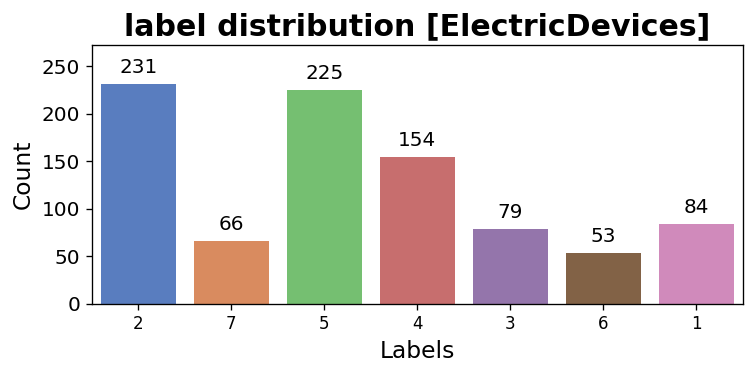

In [9]:
# Classifier MR-Hydra, Dataset ED 10%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = _set_bakeoff_classifier(CLASSIFIER_NAME, random_state=0, n_jobs=1)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_,  trace_m_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

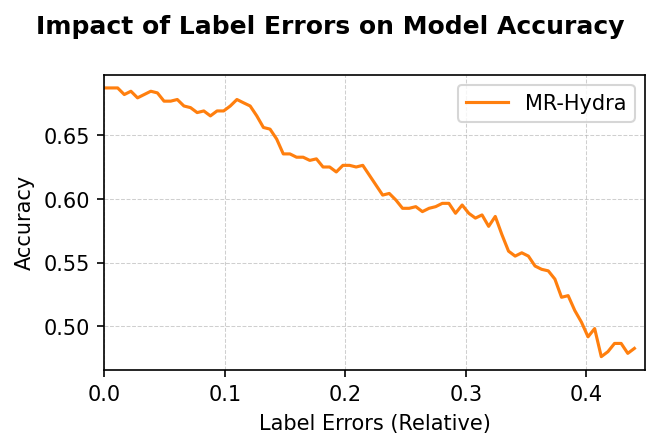

In [6]:
visualize_acc_decr(df_acc_inst_rel=df_, dpi_=150, first="relative", second=None, w_=4.5, h_=3, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, save_fig=True)

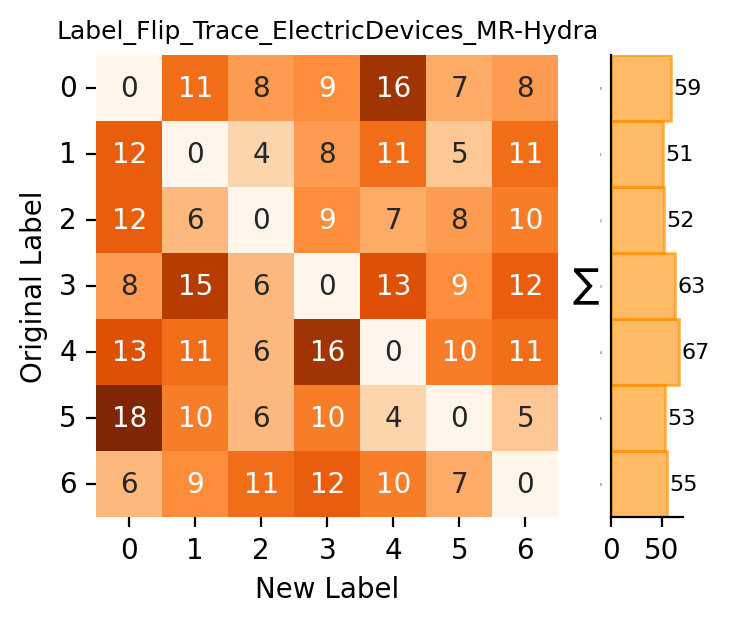

In [7]:
visualize_trace_M(trace_M=trace_m_, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, dpi=200, filename_="trace_M", save_fig=True)

In [ ]:
DATASET_NAME = "ElectricDevices"        #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 10                        #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","random_seed":1,"start":0,"stop":550,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True  


current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
